In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from sklearn.linear_model import LinearRegression
import numpy as np

%matplotlib inline

In [134]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#D1A72A', '#2D2D2D', '#DDDDC9', '#EB5852', '#CCC614', '#993D3D']),
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 30,
    'axes.grid': True,
    'grid.color': '#2D2D2D',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 4.0,
    'legend.frameon' : False,
    'axes.labelcolor': '#D1A72A',
    'axes.labelsize': 15,
    'font.size': 15,
    'grid.linestyle': '--',
    'text.color': '#DDDDC9',
    'axes.labelcolor': '#DDDDC9',
    'axes.edgecolor': 'silver',
    'xtick.color': '#DDDDC9',
    'ytick.color': '#DDDDC9'
})

In [88]:
df_continuity = pd.read_csv('team-minutes-continuity.csv')
df_continuity.head()

,season,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,2017,51,41,73.0,51.0,53.0,74.0,80.0,59,81,...,52.0,62.0,61,64.0,93.0,44,87.0,84.0,51.0,82.0
1,2016,68,79,80.0,46.0,83.0,50.0,71.0,75,67,...,53.0,56.0,50,68.0,85.0,47,69.0,84.0,70.0,77.0
2,2015,87,85,51.0,90.0,84.0,55.0,70.0,50,95,...,93.0,76.0,63,53.0,47.0,52,69.0,62.0,77.0,75.0
3,2014,88,50,61.0,64.0,39.0,38.0,62.0,57,80,...,66.0,52.0,29,81.0,80.0,70,98.0,82.0,61.0,72.0
4,2013,53,59,64.0,69.0,60.0,48.0,62.0,59,71,...,89.0,81.0,37,46.0,65.0,53,83.0,68.0,62.0,77.0


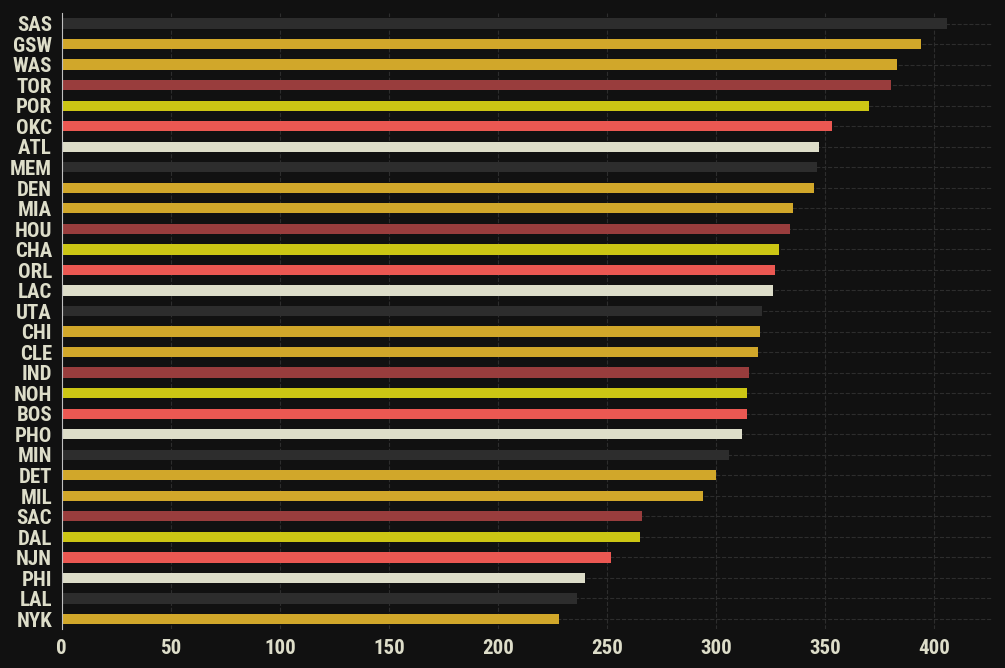

In [72]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor='#111111')

ax = df_continuity.set_index('season').transpose().dropna(axis=1, how='any').iloc[:,:5].sum(axis=1).sort_values().plot(kind='barh', figsize=(12,8))

In [89]:
df_wins = pd.read_csv('historical-win-total.csv')
df_wins.head()

,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS,season
0,24.0,55,36.0,27.0,50.0,24.0,46.0,39.0,58,65.0,...,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0,2017
1,43.0,53,36.0,41.0,51.0,33.0,40.0,37.0,67,55.0,...,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0,2016
2,48.0,48,48.0,42.0,57.0,42.0,33.0,44.0,73,41.0,...,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0,2015
3,60.0,40,33.0,50.0,53.0,50.0,30.0,32.0,67,56.0,...,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0,2014
4,38.0,25,43.0,48.0,33.0,49.0,36.0,29.0,51,54.0,...,23.0,19.0,48.0,54.0,28.0,62.0,48.0,25.0,44.0,2013


In [74]:
df_continuity.set_index('season').transpose().dropna(axis=1, how='any')

season,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
ATL,51.0,68.0,87.0,88.0,53.0,52.0,72.0,88.0,80.0,79.0,76.0,72.0,50.0
BOS,41.0,79.0,85.0,50.0,59.0,53.0,65.0,76.0,79.0,94.0,50.0,75.0,72.0
CHA,73.0,80.0,51.0,61.0,64.0,49.0,57.0,70.0,59.0,52.0,66.0,72.0,66.0
CHI,51.0,46.0,90.0,64.0,69.0,63.0,93.0,49.0,72.0,73.0,76.0,65.0,82.0
CLE,53.0,83.0,84.0,39.0,60.0,55.0,64.0,58.0,71.0,78.0,78.0,92.0,63.0
DAL,74.0,50.0,55.0,38.0,48.0,39.0,71.0,79.0,63.0,91.0,75.0,77.0,82.0
DEN,80.0,71.0,70.0,62.0,62.0,82.0,64.0,72.0,76.0,66.0,95.0,66.0,84.0
DET,59.0,75.0,50.0,57.0,59.0,71.0,69.0,80.0,48.0,81.0,79.0,81.0,90.0
GSW,81.0,67.0,95.0,80.0,71.0,52.0,47.0,53.0,58.0,56.0,91.0,67.0,88.0
HOU,59.0,65.0,85.0,48.0,77.0,32.0,73.0,77.0,64.0,74.0,76.0,75.0,54.0


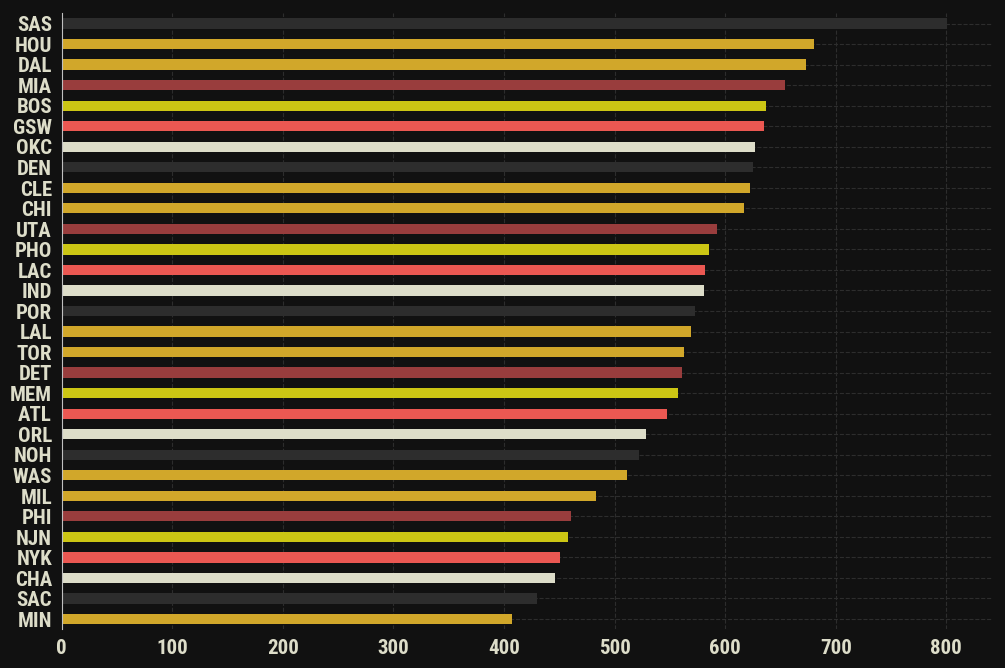

In [75]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor='#111111')

ax = df_wins.set_index('season').transpose().dropna(axis=1, how='any').sum(axis=1).sort_values().plot(kind='barh', figsize=(12,8))

In [266]:
wins_since_2005 = df_wins.set_index('season').transpose().dropna(axis=1, how='any').mean(axis=1).reset_index().set_index('index').rename(columns={'index':'team', 0:'wins'})

In [276]:
wins_since_2013 = df_wins.set_index('season').transpose().dropna(axis=1, how='any').iloc[:,:5].mean(axis=1).reset_index().set_index('index').rename(columns={'index':'team', 0:'wins'})
continuity_since_2013 = df_continuity.set_index('season').transpose().dropna(axis=1, how='any').iloc[:,:5].mean(axis=1).reset_index().set_index('index').rename(columns={'index':'team', 0:'continuity'})

wins_since_2013['continuity'] = np.nan
wins_since_2013.continuity.fillna(continuity_since_2013.continuity, inplace=True)




In [268]:
continuity_since_2005 = df_continuity.set_index('season').transpose().dropna(axis=1, how='any').mean(axis=1).reset_index().set_index('index').rename(columns={'index':'team', 0:'continuity'})

In [269]:
continuity_since_2005.head()

,continuity
index,
ATL,70.461538
BOS,67.538462
CHA,63.076923
CHI,68.692308
CLE,67.538462


In [270]:
wins_since_2005['continuity'] = np.nan

In [271]:
wins_since_2005.continuity.fillna(continuity_since_2005.continuity, inplace=True)

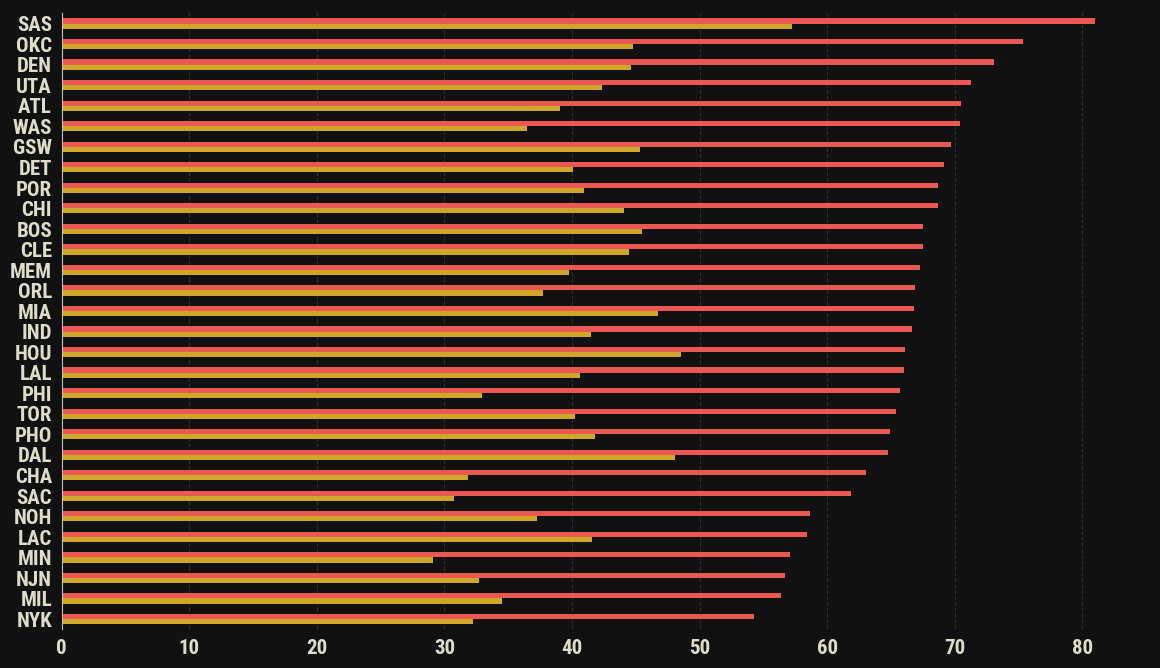

In [282]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor='#111111')

ax = wins_since_2005.sort_values(by='continuity').plot(kind='barh', figsize=(14,8), color=('#D1A72A', '#EB5852'), ax=ax)

ax.set_ylabel('')
ax.legend('')

ax.grid(axis='y')

plt.savefig('wins_continuity_since_05.svg', bbox_inches='tight', facecolor=fig.get_facecolor())


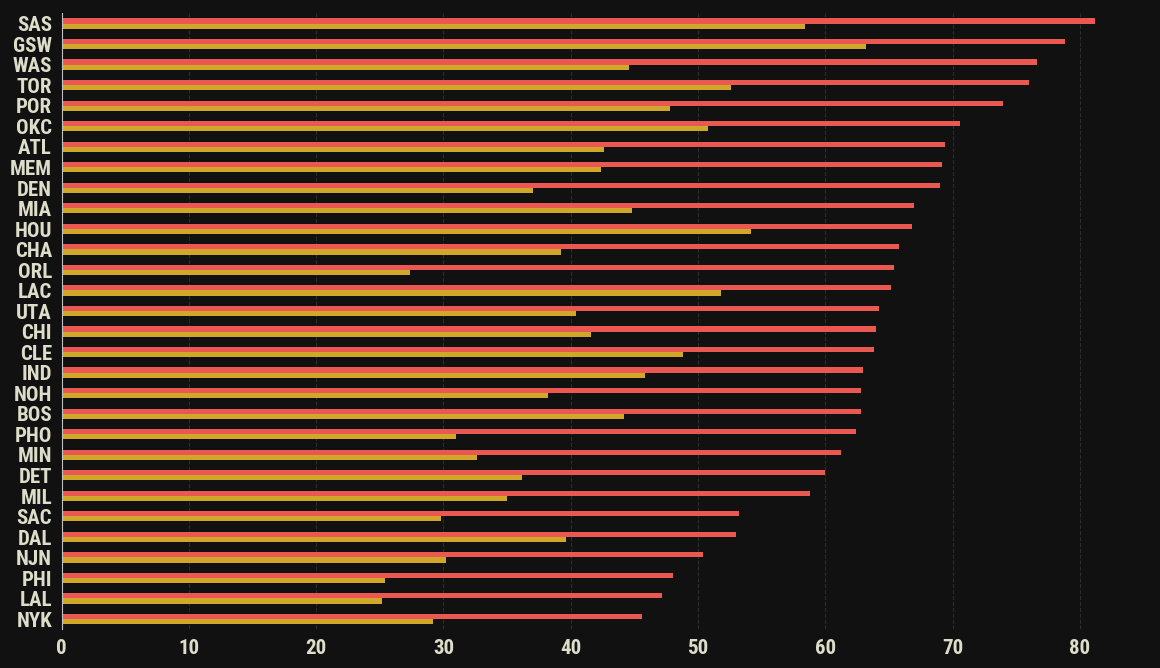

In [279]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor='#111111')

ax = wins_since_2013.sort_values(by='continuity').plot(kind='barh', figsize=(14,8), color=('#D1A72A', '#EB5852'), ax=ax)

ax.set_ylabel('')
ax.legend('')

ax.grid(axis='y')




In [83]:
df_continuity = df_continuity.iloc[:13,:].set_index('season').transpose()

In [84]:
df_wins = df_wins.iloc[:13,:].set_index('season').transpose()

In [85]:
df_continuity.sum(axis=1).sort_values()

NYK     705.0
MIL     733.0
NJN     737.0
MIN     742.0
LAC     759.0
NOH     763.0
SAC     804.0
CHA     820.0
DAL     842.0
PHO     844.0
TOR     850.0
PHI     854.0
LAL     858.0
HOU     859.0
IND     866.0
MIA     869.0
ORL     870.0
MEM     875.0
CLE     878.0
BOS     878.0
CHI     893.0
POR     893.0
DET     899.0
GSW     906.0
WAS     915.0
ATL     916.0
UTA     927.0
DEN     950.0
OKC     980.0
SAS    1053.0
dtype: float64

In [86]:
df_wins.sum(axis=1).sort_values()

MIN    363.0
SAC    380.0
NJN    416.0
PHI    418.0
NYK    418.0
CHA    428.0
MIL    453.0
WAS    466.0
ORL    492.0
NOH    504.0
DET    507.0
MEM    512.0
PHO    523.0
TOR    530.0
ATL    534.0
LAL    535.0
IND    537.0
LAC    545.0
POR    546.0
UTA    567.0
CHI    570.0
OKC    575.0
DEN    576.0
CLE    580.0
BOS    592.0
MIA    595.0
GSW    601.0
DAL    615.0
HOU    629.0
SAS    742.0
dtype: float64

In [87]:
df_continuity.iloc[7].sort_values(ascending=False)

season
2005    90.0
2006    81.0
2008    81.0
2010    80.0
2007    79.0
2016    75.0
2012    71.0
2011    69.0
2013    59.0
2017    59.0
2014    57.0
2015    50.0
2009    48.0
Name: DET, dtype: float64

In [201]:
df_wins.set_index('season').dropna(axis=0, how='any').drop(index=2004).loc[:,'LAL']

season
2017    35.0
2016    26.0
2015    17.0
2014    21.0
2013    27.0
2012    45.0
2011    41.0
2010    57.0
2009    57.0
2008    65.0
2007    57.0
2006    42.0
2005    45.0
Name: LAL, dtype: float64

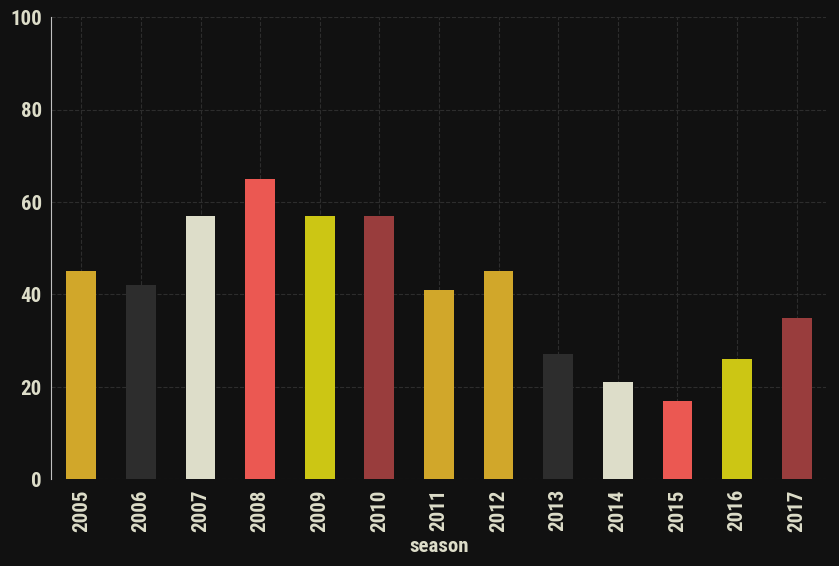

In [210]:
fig, ax = plt.subplots(facecolor = '#111111', edgecolor = '#111111')

df_continuity.set_index('season').dropna(axis=0, how='any').loc[:,'LAL'].plot(figsize=(10,6), kind='line', ylim=[0,100], xlim=[2005,2017], ax=ax)
df_wins.set_index('season').dropna(axis=0, how='any').drop(index=2004).loc[:,'LAL'].sort_index().plot(figsize=(10,6), kind='bar', ylim=[0,100], xlim=[2005,2017], ax=ax)




In [165]:
season_12_continuity = pd.DataFrame(df_continuity.set_index('season').loc[2012])
season_12_continuity.rename(columns={2012:'continuity'}, inplace=True)

In [166]:
season_12_wins = pd.DataFrame(df_wins.set_index('season').loc[2012])
season_12_wins.rename(columns={2012:'wins'}, inplace=True)

In [167]:
season_12_full = pd.concat([season_12_continuity, season_12_wins], axis=1)

In [168]:
season_12_full.head()

,continuity,wins
ATL,52.0,44.0
BOS,53.0,41.0
CHA,49.0,21.0
CHI,63.0,45.0
CLE,55.0,24.0


In [169]:
x = season_12_full[['continuity']].values
y = season_12_full[['wins']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
m

b = lm.intercept_
b

array([17.38453392])

[0.39812267]


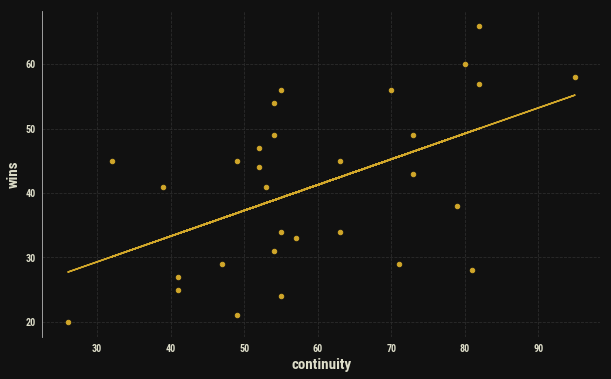

In [170]:
fig, ax = plt.subplots(facecolor='#111111', edgecolor= '#111111')

ax = season_12_full.plot(kind='scatter', x='continuity', y='wins', figsize=(10,6), ax=ax)
plt.plot(season_12_full.continuity, m*season_12_full.continuity + b, '-')

print(m)

In [171]:
def make_season(year):

    season_continuity = pd.DataFrame(df_continuity.set_index('season').loc[year])
    season_continuity.rename(columns={year:'continuity'}, inplace=True)

    season_wins = pd.DataFrame(df_wins.set_index('season').loc[year])
    season_wins.rename(columns={year:'wins'}, inplace=True)

    season_full = pd.concat([season_continuity, season_wins], axis=1)
    
    return season_full

In [269]:
seasons_list = []

for i in range(1952,2018):
    seasons_list.append(make_season(i))
    

In [270]:
all_seasons = pd.concat(seasons_list, axis=0)

In [299]:
years = sorted(list(range(1952,2018)) * 30)

In [301]:
all_seasons['season'] = pd.Series(years)

In [306]:
all_seasons.reset_index(inplace=True)

In [308]:
all_seasons['season'] = pd.Series(years)

In [315]:
all_seasons.dropna(axis=0, how='any').to_csv('all-teams-seasons.csv', index=False)

[0.34402271]


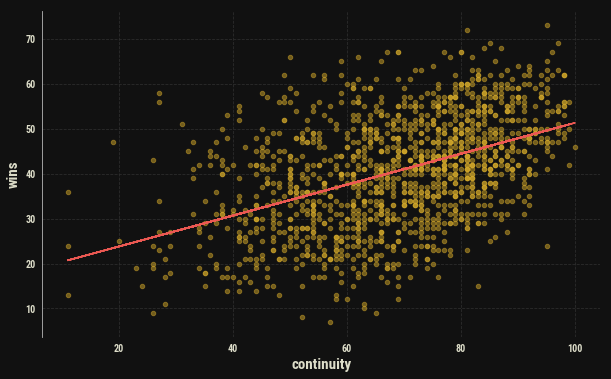

In [319]:
x = all_seasons.dropna()[['continuity']].values
y = all_seasons.dropna()[['wins']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

fig, ax = plt.subplots(facecolor='#111111', edgecolor= '#111111')

ax = all_seasons.plot(kind='scatter', x='continuity', y='wins', figsize=(10,6), alpha = .5, ax=ax)
plt.plot(all_seasons.continuity, m*all_seasons.continuity + b, '-', color='#EB5852')

print(m)

In [321]:
df_continuity.columns

Index(['season', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH',
       'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA',
       'WAS'],
      dtype='object')

In [230]:
laker_continuity = pd.DataFrame(df_continuity.set_index('season').dropna(axis=0, how='any').loc[:,'LAL'])
laker_wins = pd.DataFrame(df_wins.set_index('season').dropna(axis=0, how='any').drop(index=2004).loc[:,'LAL'].sort_index())



In [231]:
laker_continuity.rename(columns={'LAL':'continuity'}, inplace=True)

In [228]:
laker_continuity.to_csv('laker_continuity.csv')

In [233]:
laker_wins['team'] = 'LAL'

In [234]:
laker_wins.rename(columns={'LAL':'wins'}, inplace=True)

In [238]:
laker_wins.to_csv('laker_wins.csv')

In [244]:
team_list = df_continuity.set_index('season').columns.tolist()

In [246]:
for team_name in team_list:
    
    continuity = pd.DataFrame(df_continuity.set_index('season').dropna(axis=0, how='any').loc[:,team_name])
    wins = pd.DataFrame(df_wins.set_index('season').dropna(axis=0, how='any').drop(index=2004).loc[:,team_name].sort_index())

    continuity['team'] = team_name
    wins['team'] = team_name

    continuity.rename(columns={team_name:'continuity'}, inplace=True)
    wins.rename(columns={team_name:'wins'}, inplace=True)
    
    wins.wins = wins.wins.astype(int)

    continuity.to_csv(team_name + '_continuity.csv')
    wins.to_csv(team_name + '_wins.csv')

In [256]:
pd.DataFrame(df_continuity.set_index('season').transpose().dropna(axis=1, how='any').mean(axis=1)).sort_values(by=0, ascending=False)

,0
SAS,81.000000
OKC,75.384615
DEN,73.076923
UTA,71.307692
ATL,70.461538
WAS,70.384615
GSW,69.692308
DET,69.153846
POR,68.692308
CHI,68.692308


In [257]:
pd.DataFrame(df_wins.set_index('season').transpose().dropna(axis=1, how='any').mean(axis=1)).sort_values(by=0, ascending=False)

,0
SAS,57.214286
HOU,48.571429
DAL,48.071429
MIA,46.714286
BOS,45.500000
GSW,45.357143
OKC,44.785714
DEN,44.642857
CLE,44.428571
CHI,44.071429
